# Define figure projection

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from antarctic_plots import fetch, utils
import pygmt

C:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots_interactive\lib\site-packages\xarray\backends\plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


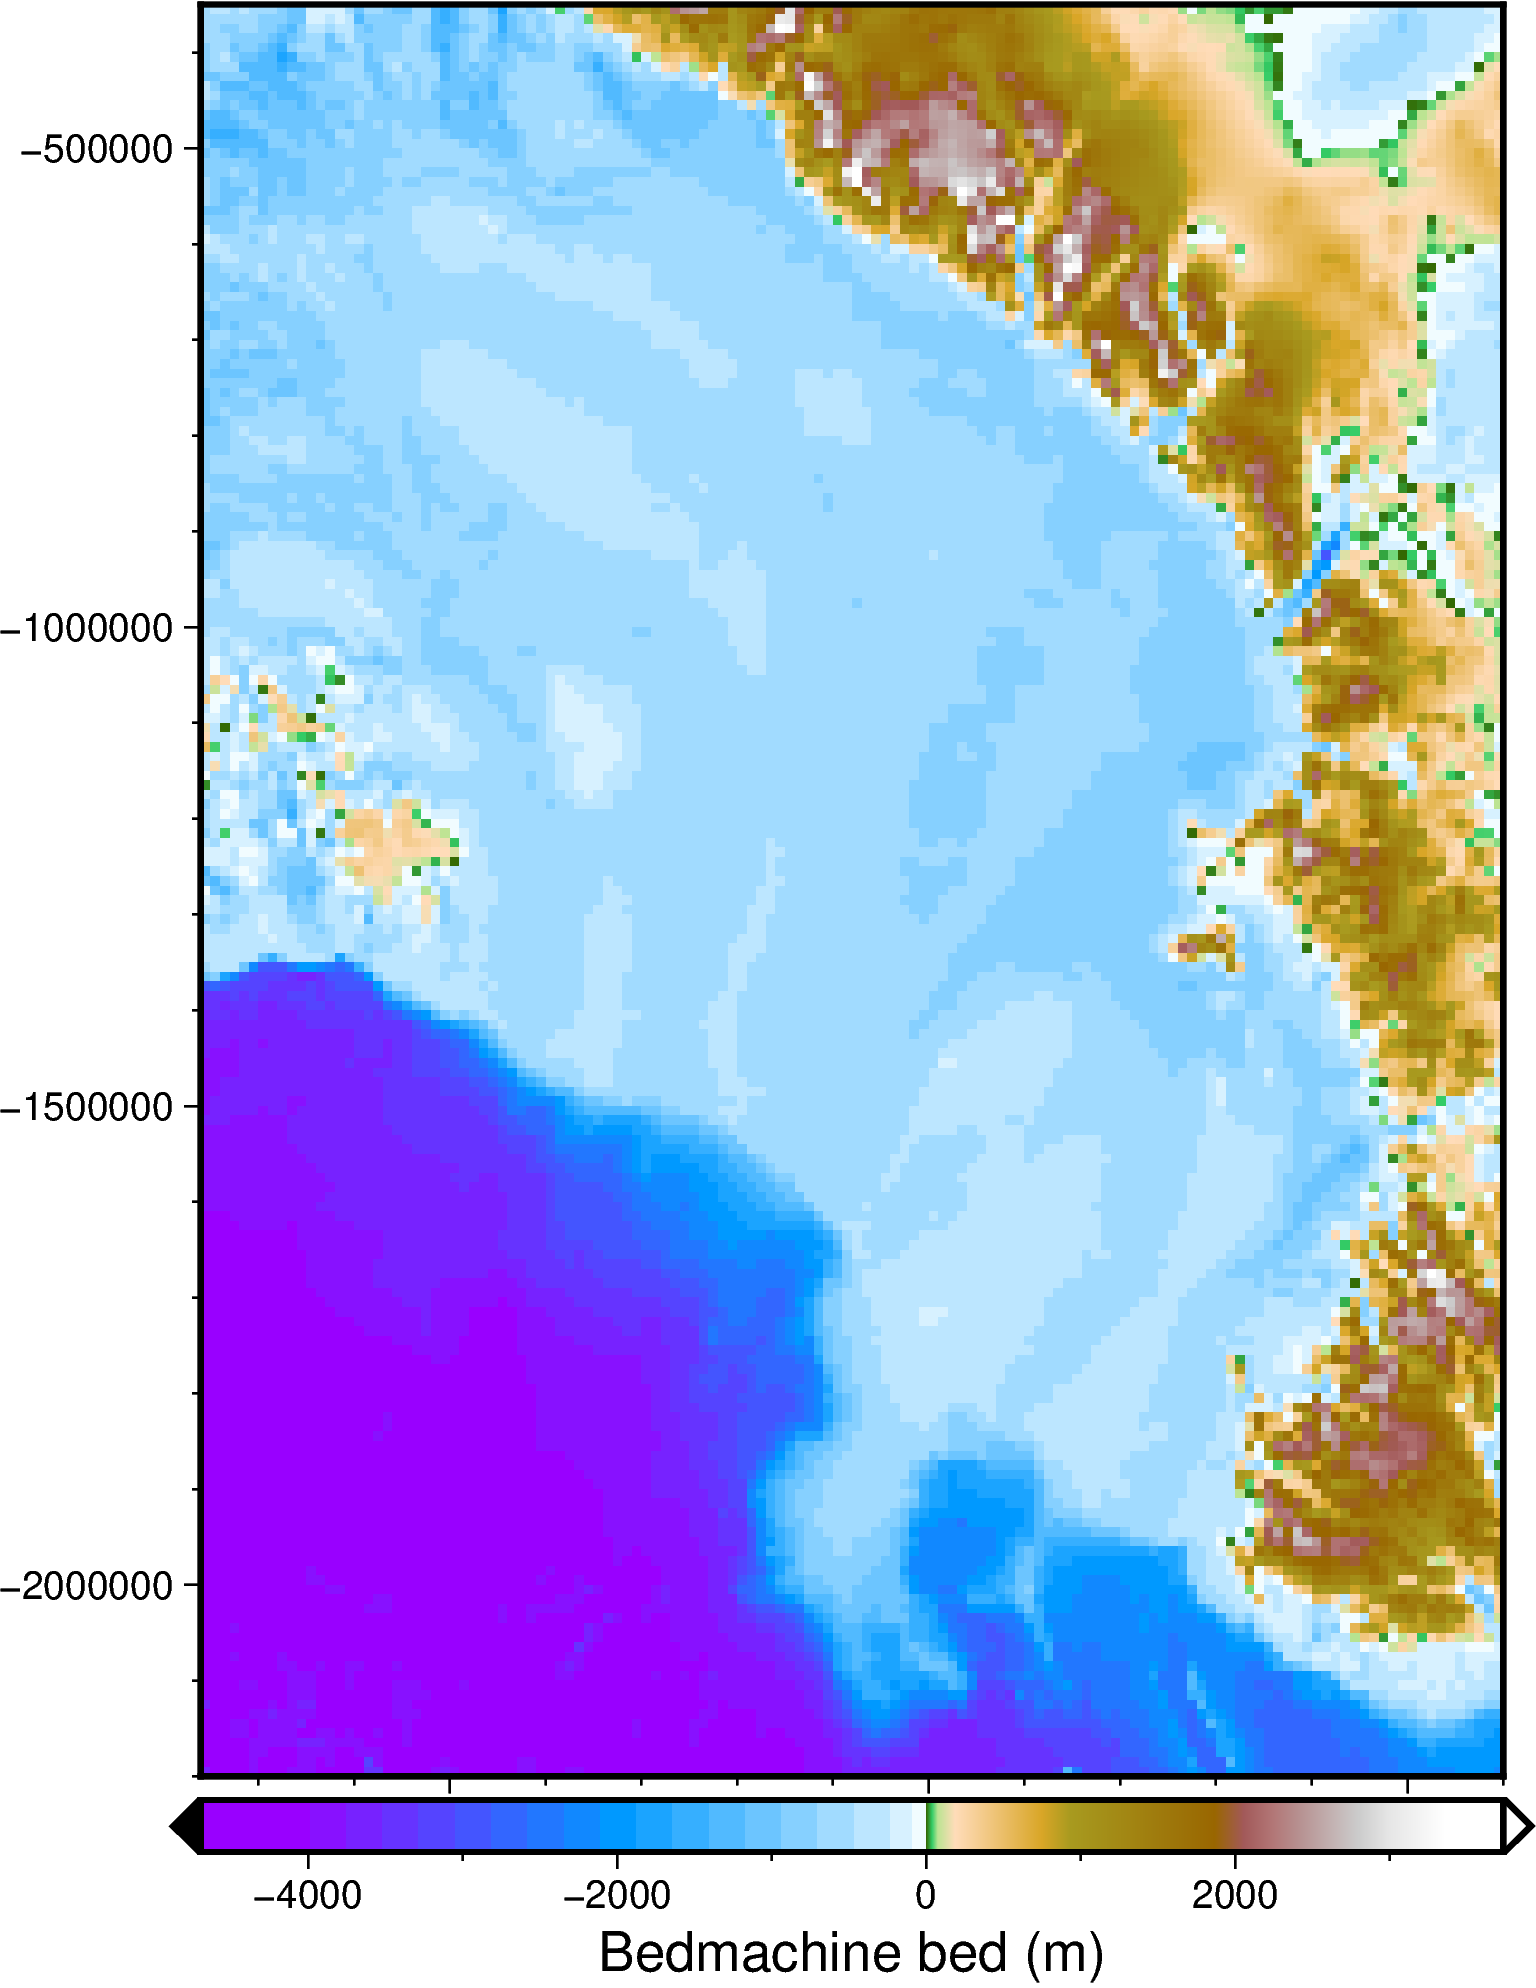

In [2]:
# load a grid file to plot
bed = fetch.bedmachine(layer="bed")

# define a region to plot
# either full extent of the grid file
# region = utils.get_grid_info(bed)[1]

# or a custom subset
region = [-760e3, 600e3, -2200e3, -350e3]

# set figure projection and size from input region
proj_xy = utils.set_proj(region)[0]
fig_width = utils.set_proj(region)[2]

# use standard PyGMT commands to plot figure
fig = pygmt.Figure()

fig.grdimage(
    grid=bed,
    cmap="globe",
    projection=proj_xy,
    region=region,
    frame=True,  # ['+gwhite'],
    nan_transparent=True,
)

# display colorbar
fig.colorbar(
    cmap=True,
    position=f"jBC+w{fig_width}c+jTC+h+o0c/.2c+e",
    frame="xaf+lBedmachine bed (m)",
)

# save the figure to use in the Gallery examples
fig.savefig("outputs/setting_projection.png")

# display the figure
fig.show()